In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Customers Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South Amer

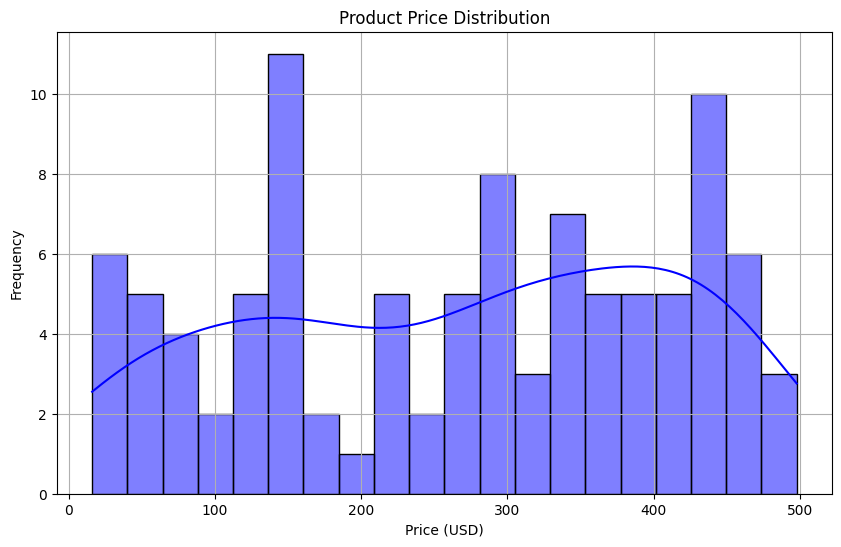

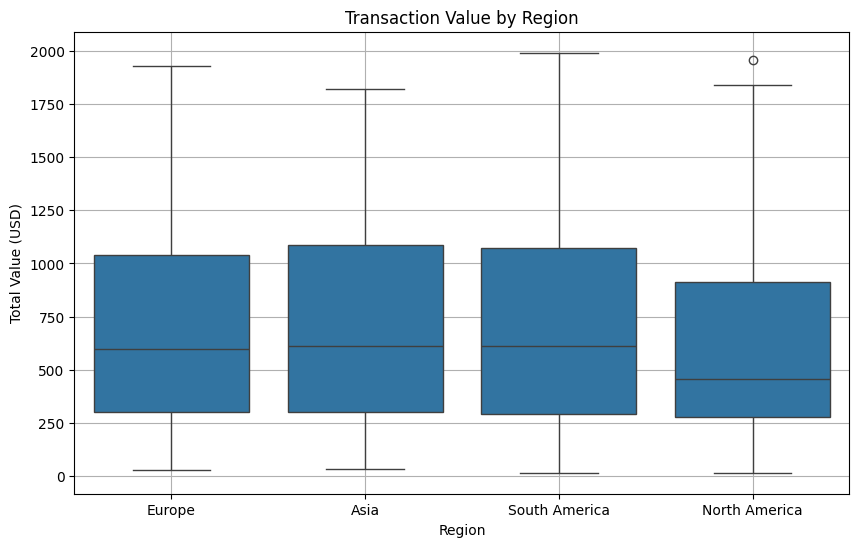

<ipython-input-9-db84e35d7b29>:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




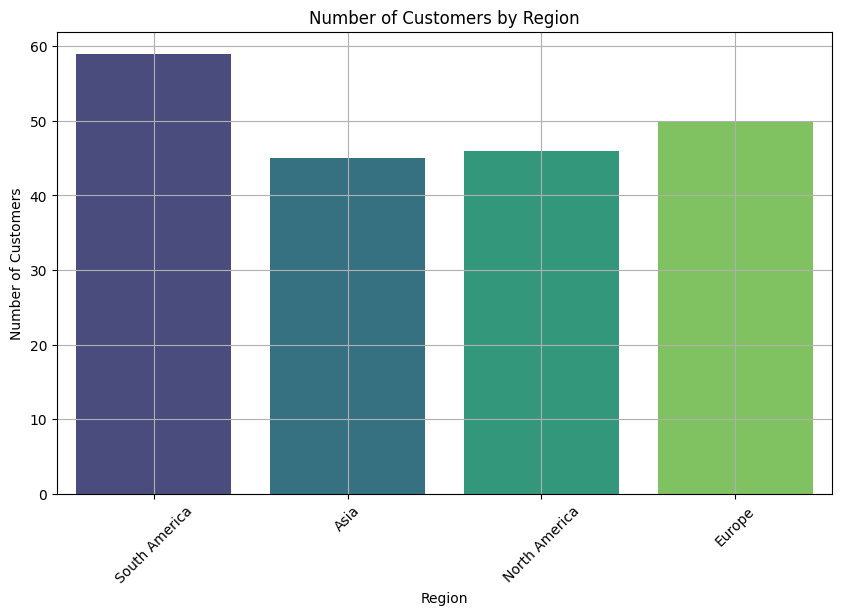

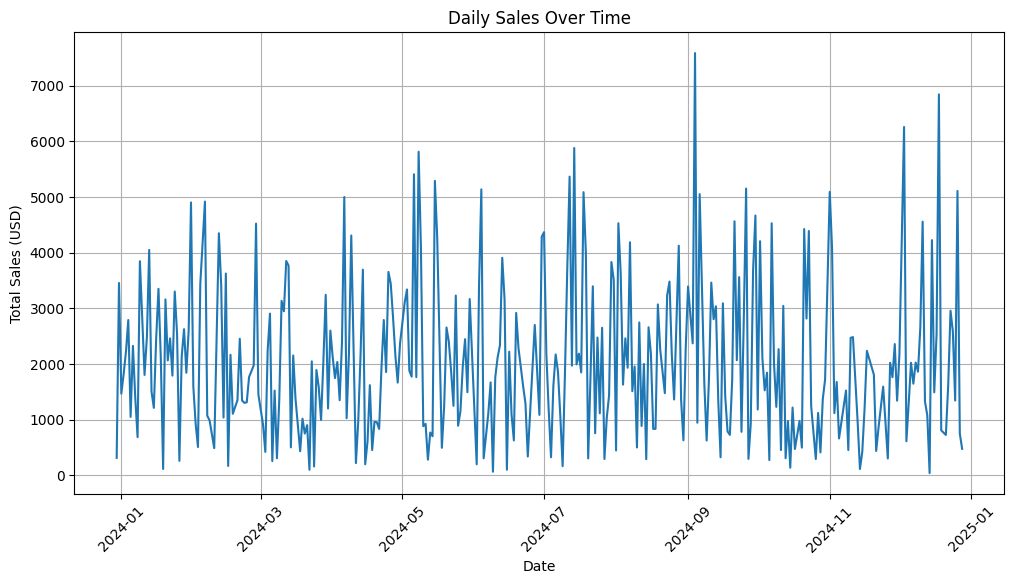

<ipython-input-9-db84e35d7b29>:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




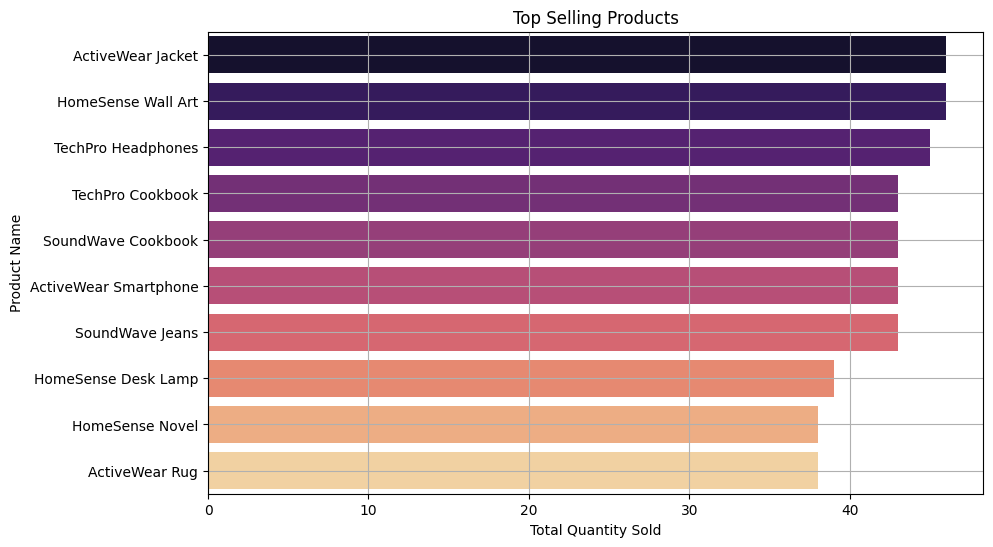

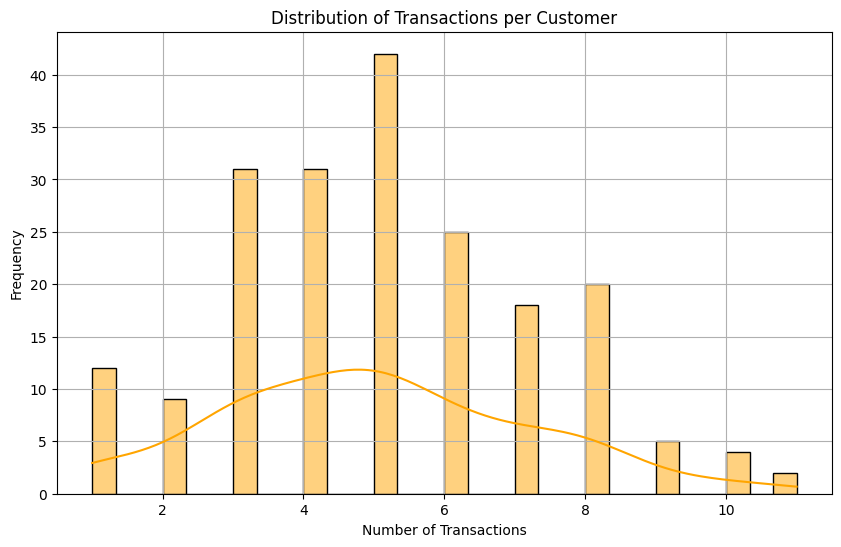

In [9]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Transactions.csv")

# Check for missing values
print("Missing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# EDA on Customers.csv
print("\nCustomers Overview:")
print(customers.info())
print(customers.describe(include='all'))

# EDA on Products.csv
print("\nProducts Overview:")
print(products.info())
print(products.describe())

# EDA on Transactions.csv
print("\nTransactions Overview:")
print(transactions.info())
print(transactions.describe())

# Merge datasets for holistic insights
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Visualizations

# 1. Price distribution of products
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=20, kde=True, color='blue')
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# 2. Transaction value analysis by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=merged_data)
plt.title("Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Total Value (USD)")
plt.grid()
plt.show()

# 3. Number of Customers by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 4. Daily Sales Over Time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
daily_sales = transactions.groupby(transactions['TransactionDate'].dt.date)['TotalValue'].sum()

plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 5. Top Selling Products
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
top_product_names = products[products['ProductID'].isin(top_products.index)]['ProductName']
top_products_df = pd.DataFrame({'ProductName': top_product_names, 'TotalQuantity': top_products.values})

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_df, x='TotalQuantity', y='ProductName', palette='magma')
plt.title('Top Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.grid()
plt.show()

# 6. Distribution of Transactions per Customer
customer_transactions = transactions.groupby('CustomerID')['TransactionID'].count()
plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions, bins=30, kde=True, color='orange')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 7. Interactive Visualization of Daily Sales
fig = px.line(daily_sales.reset_index(), x='TransactionDate', y='TotalValue', title='Interactive Daily Sales Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Total Sales (USD)')
fig.show()
